# Kvalitet podataka

In [1]:
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Učitaćemo dataset-ove koji će nam biti neophodni za demonstraciju. Zatim ćemo prikazati neke osnovne informacije o datasetovima.

In [21]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.drop(["Z_CostContact", "Z_Revenue", "Dt_Customer"], axis="columns", inplace=True)

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

   Recency  MntWines  MntFruits  ...  NumCatalogPurchases  NumStorePurchases  \
0       58       635         88  ...                   10    

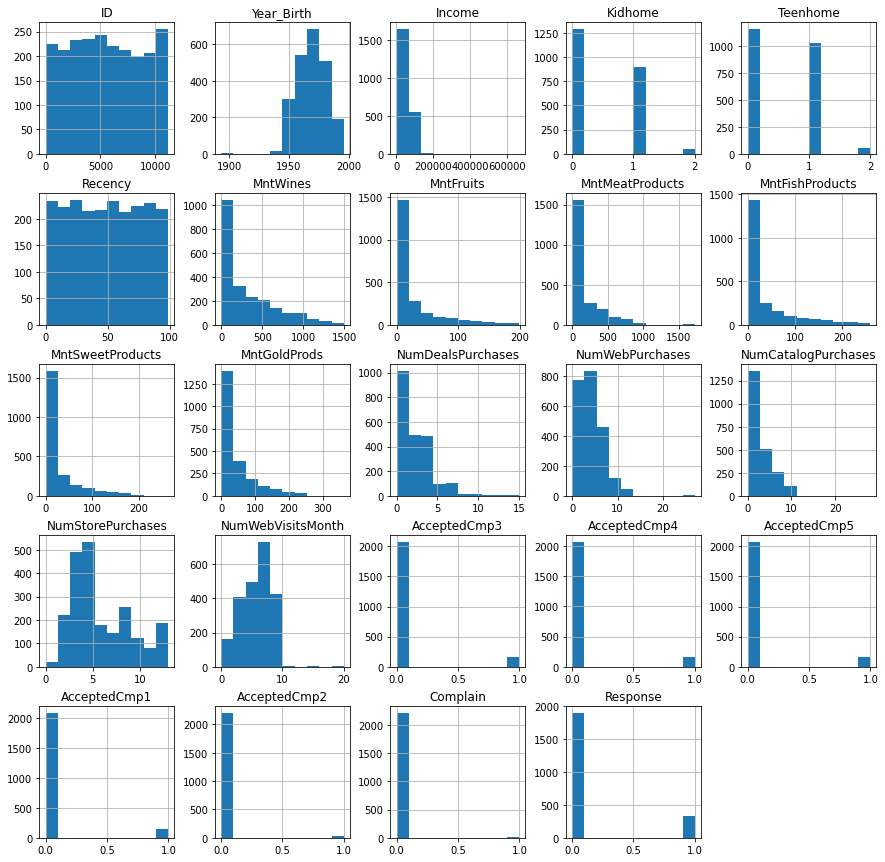

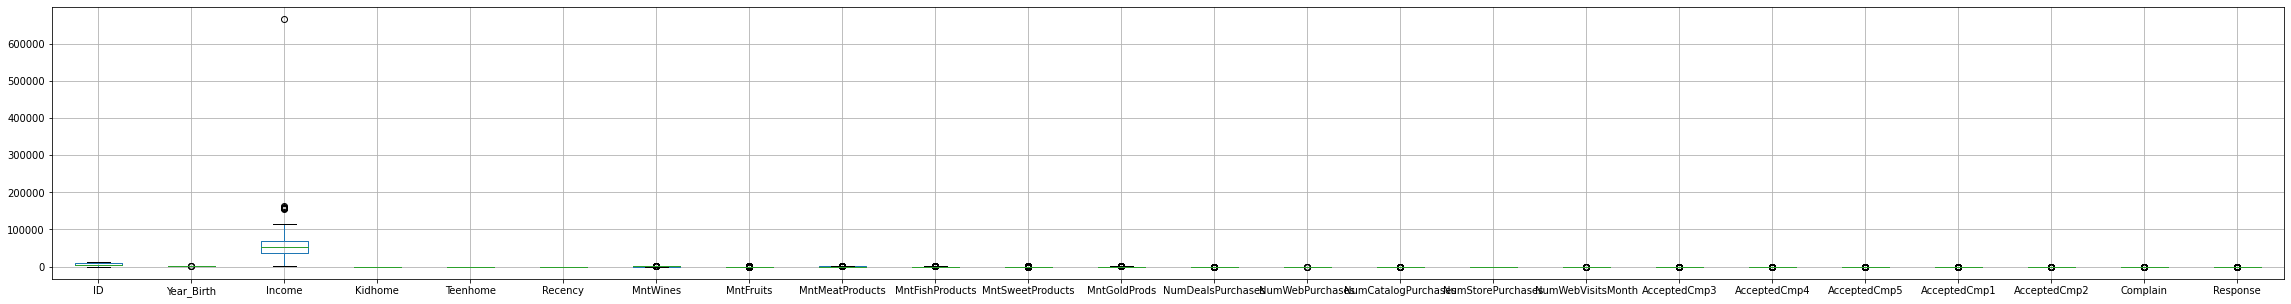

In [22]:
print(customer_data.head(10))
print(customer_data.info())

customer_data.hist(figsize=(15,15))
plt.show()
customer_data.boxplot(figsize=(40, 5))
plt.show()

## Tipovi atributa u dataset-u

U ovom dataset-u, imamo:
- Nominalne atribute: "Marital_Status"
- Binarne atribute: kolone "AcceptedCmpX", "Complain", "Response"
- Ordinalne atribute: "Education"
- Numeričke atribute zasnovane na intervalima: "Year_Birth"
- Numeričke atribute zasnovane na proporcijama: "Income", "Kidhome", "Teenhome"...

Kada je u pitanju podela podataka na diskretne i kontinualne, ovde imamo primere i jednih i drugih, i to:
- Diskretni: "Marital_Status", "Education"...
- Kontinualni: "Income"

## Mere centralne tendencije

Za numberičke podatke u datasetu, izračunaćemo sve tri mere centranle tendencije:
- Aritmetičku sredinu
- Medijalnu vrednost
- Mod podataka
- Srednji opseg podataka

Za nominalne vrednosti izračunaćemo samo mod podataka, jer ostale dve mere nemaju smisla. Izuzetak je ordinalni podatak "Education", za koji ćemo izračunati i medijalnu vrednost. Za kolonu "ID" nećemo računati ni jednu od ovih vrednosti, jer je jedina operacija koja ima smisla nad ovim atributom poređenje jednakosti.

In [24]:
numerical_data = customer_data[["Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", 
                                "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Year_Birth"]]
nominal_data = customer_data[["Response", "Complain", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Education", "Marital_Status"]]

Sada ćemo prikazati mere centralne tendencije za numeričke podatke:

In [26]:
print(numerical_data.mean())

Income                 52247.251354
Kidhome                    0.444196
Teenhome                   0.506250
Recency                   49.109375
MntWines                 303.935714
MntFruits                 26.302232
MntMeatProducts          166.950000
MntFishProducts           37.525446
MntSweetProducts          27.062946
MntGoldProds              44.021875
NumDealsPurchases          2.325000
NumWebPurchases            4.084821
NumCatalogPurchases        2.662054
NumStorePurchases          5.790179
NumWebVisitsMonth          5.316518
Year_Birth              1968.805804
dtype: float64


In [27]:
print(numerical_data.median())

Income                 51381.5
Kidhome                    0.0
Teenhome                   0.0
Recency                   49.0
MntWines                 173.5
MntFruits                  8.0
MntMeatProducts           67.0
MntFishProducts           12.0
MntSweetProducts           8.0
MntGoldProds              24.0
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        2.0
NumStorePurchases          5.0
NumWebVisitsMonth          6.0
Year_Birth              1970.0
dtype: float64


In [31]:
print(numerical_data.mode())

   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  7500.0        0         0       56         2          0                7   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                0                 0             1                  1   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                2                    0                  3                  7   

   Year_Birth  
0        1976  


Na koloni "Income" demonstriraćemo kako je moguće aproksimirati medijalnu vrednost atributa, za slučajeve kada ima mnogo podataka u dataset-u, pa je operacija traženja medijalne vrednosti skupa.

Prvo ćemo podeliti vrednosti atributa "Income" u 4 grupe:

In [37]:
income_1 = customer_data["Income"][customer_data["Income"] <= 20000]
income_2 = customer_data["Income"][np.logical_and(customer_data["Income"] > 20000, customer_data["Income"] <= 60000)]
income_3 = customer_data["Income"][np.logical_and(customer_data["Income"] >= 60000, customer_data["Income"] <= 80000)]
income_4 = customer_data["Income"][customer_data["Income"] > 80000]

Odštampaćemo broj vrednosti unutar svakog od ovih skupova, kako bismo videli koji od njih predstavlja medijalni interval, odnosno onaj interval koji sadrži medijalnu vrednost.

In [41]:
print(len(income_1))
print(len(income_2))
print(len(income_3))
print(len(income_4))
print("Ukupan broj podataka podeljen sa 2: ", len(customer_data["Income"])/2)

127
1248
625
217
Ukupan broj podataka podeljen sa 2:  1120.0


Možemo zaključiti da će se medijalna vrednost atributa nalaziti u skupu 2. Sada ćemo, na odnovu formule, aproksimirati medijalnu vrednost.

In [45]:
income_median = np.min(income_2) + ((len(customer_data["Income"]) / 2 - len(income_1)) / len(income_2)) * (np.max(income_2) - np.min(income_2))
print("Aproksimirana vrednost: ", income_median)
print("Stvarna vrednost:", customer_data["Income"].median())

Aproksimirana vrednost:  51853.48557692308
Stvarna vrednost: 51381.5


Iako se vrednosti ne poklapaju, nisu daleko jedna od druge.

Sada ćemo prikazati mod nominalnih atributa.

In [47]:
print(nominal_data.mode())

   Response  Complain  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0         0         0             0             0             0             0   

   AcceptedCmp5   Education Marital_Status  
0             0  Graduation        Married  


Prikazaćemo i srednji opseg numeričkih podataka:

In [53]:
print((numerical_data.max() + numerical_data.min())/2)

Income                 334198.0
Kidhome                     1.0
Teenhome                    1.0
Recency                    49.5
MntWines                  746.5
MntFruits                  99.5
MntMeatProducts           862.5
MntFishProducts           129.5
MntSweetProducts          131.5
MntGoldProds              181.0
NumDealsPurchases           7.5
NumWebPurchases            13.5
NumCatalogPurchases        14.0
NumStorePurchases           6.5
NumWebVisitsMonth          10.0
Year_Birth               1944.5
dtype: float64


Pošto je "Education" ordinalni atribut, vrednosti unutar ove kolone konvertovaćemo u vrednosti koje odgovaraju rangu te vrednosti (od najnižeg ka najvišem obrazovanju) i za ovakve vrednosti izračunati i medijalnu vrednost podatka.

In [49]:
education = np.zeros(len(customer_data["Education"]))
education[customer_data["Education"] == "Basic"] = 1
education[customer_data["Education"] == "2n Cycle"] = 2
education[customer_data["Education"] == "Graduation"] = 3
education[customer_data["Education"] == "Master"] = 4
education[customer_data["Education"] == "PhD"] = 5

In [51]:
print(np.median(education))

3.0


Pošto je dobijena medijalna vrednost ceo broj, možemo zaključiti da je medijalna vrednost ovog atributa zapravo "Graduation". Da smo dobili razlomljenu vrednost, to bi značilo da medijana ovog atributa nije dobro definisana.

## Mere disperzije podataka

Za numeričke podatke računaćemo i:
- Opseg
- Kvartile
- Interkvartilni opseg
- five-number summary
- Varijansu
- Standardnu devijaciju

Prvo ćemo za ove podatke izračunati opseg.

In [54]:
print(numerical_data.max() - numerical_data.min())

Income                 664936.0
Kidhome                     2.0
Teenhome                    2.0
Recency                    99.0
MntWines                 1493.0
MntFruits                 199.0
MntMeatProducts          1725.0
MntFishProducts           259.0
MntSweetProducts          263.0
MntGoldProds              362.0
NumDealsPurchases          15.0
NumWebPurchases            27.0
NumCatalogPurchases        28.0
NumStorePurchases          13.0
NumWebVisitsMonth          20.0
Year_Birth                103.0
dtype: float64


Kvartili su na sledećem prikazu označeni sa 25, 50 i 75%. Standardna devijacija je označena sa std. Poslednjih 5 brojeva u tebeli (od min do max) predstavlja five-number summary.

In [55]:
print(numerical_data.describe())

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2216.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52247.251354     0.444196     0.506250    49.109375   303.935714   
std     25173.076661     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    23.750000   
50%     51381.500000     0.000000     0.000000    49.000000   173.500000   
75%     68522.000000     1.000000     1.000000    74.000000   504.250000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2240.000000      2240.000000      2240.000000       2240.000000   
mean     26.302232       166.950000        37.525446         27.062946   
std      39.773434       225.715373        54.628979         41.280498   
min       0.000000 

Odštampaćemo five-number summary preglednije.

In [59]:
for column in numerical_data.columns:
    print(column, "{", numerical_data[column].min(), numerical_data[column].quantile(0.25), numerical_data[column].median(), numerical_data[column].quantile(0.75), numerical_data[column].max(), "}")

Income { 1730.0 35303.0 51381.5 68522.0 666666.0 }
Kidhome { 0 0.0 0.0 1.0 2 }
Teenhome { 0 0.0 0.0 1.0 2 }
Recency { 0 24.0 49.0 74.0 99 }
MntWines { 0 23.75 173.5 504.25 1493 }
MntFruits { 0 1.0 8.0 33.0 199 }
MntMeatProducts { 0 16.0 67.0 232.0 1725 }
MntFishProducts { 0 3.0 12.0 50.0 259 }
MntSweetProducts { 0 1.0 8.0 33.0 263 }
MntGoldProds { 0 9.0 24.0 56.0 362 }
NumDealsPurchases { 0 1.0 2.0 3.0 15 }
NumWebPurchases { 0 2.0 4.0 6.0 27 }
NumCatalogPurchases { 0 0.0 2.0 4.0 28 }
NumStorePurchases { 0 3.0 5.0 8.0 13 }
NumWebVisitsMonth { 0 3.0 6.0 7.0 20 }
Year_Birth { 1893 1959.0 1970.0 1977.0 1996 }


Varijansa predstavlja kvadrat standardne devijacije i biće prikazana ispod:

In [61]:
print(numerical_data.std() ** 2)

Income                 6.336838e+08
Kidhome                2.898725e-01
Teenhome               2.965219e-01
Recency                8.388237e+02
MntWines               1.132978e+05
MntFruits              1.581926e+03
MntMeatProducts        5.094743e+04
MntFishProducts        2.984325e+03
MntSweetProducts       1.704080e+03
MntGoldProds           2.721442e+03
NumDealsPurchases      3.733542e+00
NumWebPurchases        7.721252e+00
NumCatalogPurchases    8.544517e+00
NumStorePurchases      1.056873e+01
NumWebVisitsMonth      5.888606e+00
Year_Birth             1.436179e+02
dtype: float64


## Mere oblika distribucije podataka